<h1 style="font-family:verdana;"> <center>💻🧠Model for ctscan Imaging in Lung Cancer Classification_ F2021332012💻🧠</center> </h1>
<p><center style="color:#159364; font-family:cursive; font-size:20px;">

# ❓**PROBLEM DEFINITION**
<div style="background-color:#f2f2f2; padding: 20px;">
  <p style="font-size:20px; font-family:verdana; line-height: 1.7em">
Lung cancer remains a significant global health challenge, with its early detection and type classification being crucial for effective treatment. One detection method involves analyzing CT scan images. These images can then be interpreted by doctors to determine the presence and type of lung cancer. However, this method has limitations; human interpretation may miss subtle patterns indicative of early-stage lung cancer. In contrast, deep learning models offer a promising avenue on this matter. They excel in recognizing intricate patterns, identifying subtle abnormalities not easily observable through other methods. Another advantage is they automatically learn relevant features from data, eliminating the need for manual feature engineeing, which is particulary usefull in medical imaging where definining explicit features can be complex.
      <p style="font-size:20px; font-family:verdana; line-height: 1.7em">
      In this study, we use a dataset containing CT scan images of lungs - - -
       -categorized as normal, squamous cell carcinoma, adenocarcinoma and large cell carcinoma.
       
       
       Our objective is to train three different models (VGG19, ResNet50, DenseNet201 and EfficientNetB4), compare their accuracy and make predictions with the one with hightest accuracy.

# 🏗️**LIBRARY IMPORT**
<div style="background-color:#f2f2f2; padding: 20px;">
  <p style="font-size:20px; font-family:verdana; line-height: 1.7em">
Import necessary libraries for the script. The first libraries are used to interact with the operative system, numerical operations and data visualization.
      <p style="font-size:20px; font-family:verdana; line-height: 1.7em">
The following ones are specific to machine learning and neural network. TensorFlow is a machine learning framework used to build and deploy machine learning models. Keras is a high-level neural networks API that runs on top of TensorFlow and its used to build, train and deploy neural networks. Keras functionality with TensorFlow is integrated thanks to the "tensorflow.keras" library.
      <p style="font-size:20px; font-family:verdana; line-height: 1.7em">
In this code, the Keras library modules are imported to serve as tools for specific tasks, such as defining distinct layer types, constructing models, preprocessing image data, implementing callbacks, leveraging pre-trained models for transfer learning, and loading pre-trained models for reuse


Also import libraries for applying ML algorithms

# **What I am Doing in this project:** 🔍

- Build Model Architecture
- Apply Almost 5 to 6 Models(ResNet50,VGG16,ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2) using Transfer Learning🧠
- Select 3 Most Promising Models 🌟
- Fine Tuning These Models to Increase Accuracy 📈


In [ ]:
import tensorflow.keras as keras  # High-level neural networks API, TensorFlow backend
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array  # Image data augmentation and processing
from tensorflow.keras.models import Sequential  # Model type to be used as a linear stack of layers
from keras.utils import np_utils  # Utilities for NumPy data manipulation specific to Keras
from tensorflow.keras.layers import Dense, Activation, Flatten, Dropout, BatchNormalization, Conv2D, MaxPooling2D  # Neural network layers
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping  # Callbacks for saving models and stopping early
from tensorflow.keras import regularizers, optimizers  # Model optimization and regularization techniques
import tensorflow as tf  # Core library for tensor manipulation and computation
from tensorflow.keras.applications import ResNet50, VGG16, ResNet101, VGG19, DenseNet201, EfficientNetB4, MobileNetV2  # Pre-trained models available
from tensorflow.keras.applications import resnet, vgg16 , vgg19, densenet, efficientnet, mobilenet_v2  # Namespace for pre-trained model architectures
from tensorflow.keras import Model  # General model class for all Keras models

import numpy as np  # Library for array and matrix manipulation
import matplotlib.pyplot as plt  # Plotting library
import pandas as pd  # Data manipulation and analysis library

import PIL  # Image processing capabilities
import os  # Operating system interfaces
import cv2  # Open source computer vision library


In [ ]:
!pip install np_utils

In [ ]:
tf.__version__

'2.15.0'

In [ ]:
#  connect colab with drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# !ls drive/MyDrive/Chest_Diagnosis
import os
os.chdir('drive/MyDrive/Chest_Diagnosis')

In [ ]:
!ls

chest-cancer-classification.ipynb  dataset


# **Get Data Ready for Tranin**g

In [ ]:
import os

# Define the path to the dataset directory
path = "dataset/train"

# Loop through each file in the directory
for files in os.listdir(path):
    # Print the full path of each file
    print(os.path.join(path, files))

dataset/train/normal
dataset/train/.ipynb_checkpoints
dataset/train/adenocarcinoma
dataset/train/large.cell.carcinoma
dataset/train/squamous.cell.carcinoma


Then we set the path for this data.

In [ ]:
train_path = "dataset/train"
valid_path = "dataset/valid"
test_path = "dataset/test"

In [ ]:
image_paths = ['dataset/train/squamous.cell.carcinoma',
'dataset/train/normal',
'dataset/train/large.cell.carcinoma',
'dataset/train/adenocarcinoma']

def load_images(image_paths = image_paths, n=36):
    # Load the images from disk.
    images = []
    for i in range(len(image_paths)):
        images_ = [cv2.imread(image_paths[i]+'/'+path) for path in os.listdir(image_paths[i])[:int(n/4)]]
        images.append(images_)
    # Convert to a numpy array and return it.
    sample = np.asarray(images)
    return sample


In [ ]:
sample = load_images()
fig = plt.figure(figsize=(20,5))
l = 1
shapes = []
for i in range(sample.shape[0]):
    for m in range(sample.shape[1]):
        ax = fig.add_subplot(4,9,m+l,xticks = [], yticks = [])
        ax.imshow(np.squeeze(sample[i,m]))
        shapes.append(sample[i,m].shape)
    l +=9

In [ ]:
np.array(shapes).mean(axis=0)


In [ ]:
# Labels for the classes
labels = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

In [ ]:
# Paths to the training, testing, and validation data
train_path = os.path.join(path, 'train')
test_path = os.path.join(path, 'test')
valid_path = os.path.join(path, 'valid')

# Load the training data
print("Loading training data...")
load_images(train_path, X_train, y_train)

# Load the testing data
print("Loading testing data...")
load_images(test_path, X_test, y_test)

# Load the validation data
print("Loading validation data...")
load_images(valid_path, X_valid, y_valid)

# Convert lists to numpy arrays
X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)
X_valid = np.array(X_valid)
y_valid = np.array(y_valid)

# **Exploratory Data Analysis** 📊


## **Show Images from Every Class**

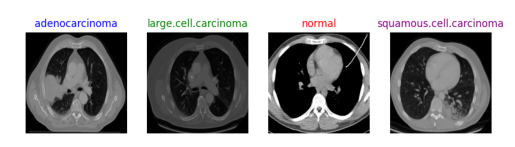

In [ ]:

# Show images from each label
k = 0
fig, ax = plt.subplots(1, 4, figsize=(10, 10))  # Ensure enough subplots for the number of labels
colors_dark = ['red', 'green', 'blue', 'purple']  # Define this if not defined

for i in labels:
    j = 0
    while j < len(y_train):
        if y_train[j] == i:
            ax[k].imshow(X_train[j])  # Assuming X_train[j] is a valid image array
            ax[k].set_title(y_train[j], color=colors_dark[k % len(colors_dark)])  # Use modulo for safety
            ax[k].axis('off')
            k += 1
            break
        j += 1

plt.show()

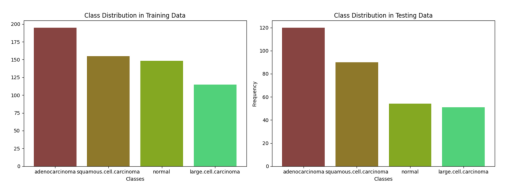

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

# Create a figure with 2 subplots in a single row
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
# Plotting Histogram for Class Distribution in Training Data
train_counts = pd.Series(y_train).value_counts()
axs[0].bar(train_counts.index, train_counts.values, color=sns.color_palette('viridis', len(train_counts)))
axs[0].set_title('Class Distribution in Training Data')
axs[0].set_xlabel('Classes')
axs[0].set_ylabel('Frequency')
axs[0].set_xticks(train_counts.index)  # Set x-ticks to class labels if they are not numeric

# Plotting Histogram for Class Distribution in Testing Data
test_counts = pd.Series(y_test).value_counts()
axs[1].bar(test_counts.index, test_counts.values, color=sns.color_palette('viridis', len(test_counts)))
axs[1].set_title('Class Distribution in Testing Data')
axs[1].set_xlabel('Classes')
axs[1].set_ylabel('Frequency')
axs[1].set_xticks(test_counts.index)  # Set x-ticks to class labels if they are not numeric

# Adjust layout and show the plots
plt.tight_layout()
plt.show()

# **Lable Encoding**

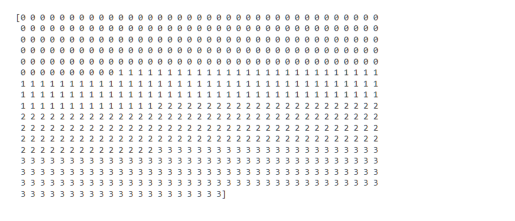

In [ ]:
# For each lable it will create a new column of 0, 1,2, 3 which indicates the presence of that category
label_dummies = pd.get_dummies(y_train)
y_train =  label_dummies.values.argmax(1)
print(pd.unique(y_train))

print(y_train)

# **Shuffle dataset to Learn more Patterns**

In [ ]:
from sklearn.utils import shuffle
# shuffle dataset
# using the shuffle function to randomly shuffle the order of your training data to ensure that the model does not learn patterns based on the order of the data
train_x, train_y = shuffle(train_x, train_y, random_state=101)
test_x, test_y = shuffle(test_x, test_y, random_state=101)

# **Visualization of labeled data**

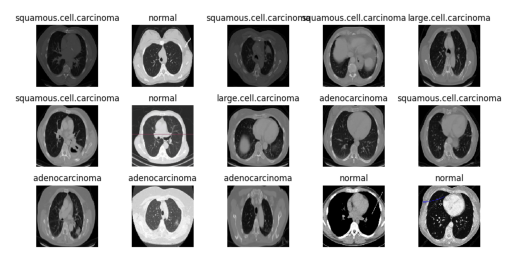

In [ ]:
import matplotlib.pyplot as plt
import random
from sklearn.preprocessing import LabelEncoder

# Assuming y_train and X_train are already defined

# Label names based on your class labels
label_names = ['adenocarcinoma', 'large.cell.carcinoma', 'normal', 'squamous.cell.carcinoma']

# Ensure y_train is correctly encoded
le = LabelEncoder()
y_train_encoded = le.fit_transform(y_train)

# Select 15 random indices
random_indices = random.sample(range(len(X_train)), 15)

# Display random 15 instances and how they are classified
fig = plt.figure(figsize=(10, 5))
columns, rows = 5, 3

for i, idx in enumerate(random_indices, 1):
    ax = fig.add_subplot(rows, columns, i)
    img = X_train[idx]
    label = y_train_encoded[idx]
    ax.title.set_text(label_names[label])
    ax.imshow(img, interpolation='nearest')
    ax.axis('off')  # Hide axes for better visualization

plt.tight_layout()
plt.show()


# **Preprocessing**
* When using Gradient Descent, We should ensure that all Features have a similar scale, otherwise, it will take much longer to converge.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
image_shape = (305, 430, 3)  # Image dimensions
N_CLASSES = 4  # Number of classes
BATCH_SIZE = 32  # Batch size

# Training data generator
train_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
train_generator = train_datagen.flow_from_directory(
    train_path,  # Training data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(305, 430),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Validation data generator
valid_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
valid_generator = valid_datagen.flow_from_directory(
    valid_path,  # Validation data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(305, 430),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Test data generator
test_datagen = ImageDataGenerator(dtype='float32', rescale=1.0/255.0)  # Normalize pixels
test_generator = test_datagen.flow_from_directory(
    test_path,  # Test data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(305, 430),  # Resize images
    class_mode='categorical'  # Categorical labels
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


# **Building a Model Architecture**🚀

This model architecture is a Convolutional Neural Network (CNN) designed for image classification, utilizing the TensorFlow Keras library. The model begins with an input layer that accepts images of shape (305, 430, 3). It then processes these images through a series of convolutional and pooling layers. The first convolutional layer has 8 filters with a 2x2 kernel, followed by a max-pooling layer with a 2x2 pool size. The second convolutional layer increases the filter count to 16, also with a 2x2 kernel and includes L2 regularization to prevent overfitting, followed by another max-pooling layer. A dropout layer with a 0.4 rate is included to further mitigate overfitting. The output from these layers is flattened into a 1D vector, which is fed into a dense layer with 300 units and ReLU activation. Another dropout layer with a 0.5 rate is applied before the final output layer, which has 4 units corresponding to the number of classes, with softmax activation for multi-class classification.

In [ ]:
# Import necessary libraries
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dropout, Flatten, Dense
from tensorflow.keras import regularizers

# Define the shape of input images (height, width, channels)
image_shape = (305, 430, 3)

# Define model hyperparameters
base_hidden_units = 8
weight_decay = 1e-3

# Initialize a Sequential model
model = Sequential([

    # First convolutional layer with 8 filters, kernel size 2x2, 'same' padding, ReLU activation, input shape as 'image_shape'
    Conv2D(filters=8, kernel_size=2, padding='same', activation='relu', input_shape=image_shape),

    # First max pooling layer with pool size 2x2
    MaxPooling2D(pool_size=2),

    # Second convolutional layer with 16 filters, kernel size 2x2, 'same' padding, ReLU activation, L2 regularization
    Conv2D(filters=16, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),

    # Second max pooling layer with pool size 2x2
    MaxPooling2D(pool_size=2),

    # Third convolutional layer with 64 filters, kernel size 2x2, 'same' padding, ReLU activation, L2 regularization
    # Conv2D(filters=64, kernel_size=2, padding='same', activation='relu', kernel_regularizer=regularizers.l2(weight_decay)),

    # Third max pooling layer with pool size 2x2
    # MaxPooling2D(pool_size=2),

    # Dropout layer to prevent overfitting with dropout rate of 0.4
    Dropout(0.4),

    # Flatten layer to convert 2D feature maps to 1D feature vectors
    Flatten(),

    # Dense (fully connected) layer with 300 units and ReLU activation
    Dense(300, activation='relu'),

    # Dropout layer to prevent overfitting with dropout rate of 0.5
    Dropout(0.5),

    # Output layer with 4 units (one for each class) and softmax activation
    Dense(4, activation='softmax')
])

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 305, 430, 8)       104       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 152, 215, 8)       0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 152, 215, 16)      528       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 76, 107, 16)       0         
_________________________________________________________________
dropout_6 (Dropout)          (None, 76, 107, 16)       0         
_________________________________________________________________
flatten_10 (Flatten)         (None, 130112)            0         
_________________________________________________________________
dense_12 (Dense)             (None, 300)             

# **Setting Up Model Checkpoint, Early Stopping, and Training** 🚀

In [ ]:
# Import necessary libraries
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
from tensorflow.keras import optimizers

# Set up a ModelCheckpoint to save the best model during training
checkpointer = ModelCheckpoint('chestmodel.hdf5', verbose=1, save_best_only=True)
# The model will be saved to 'chestmodel.hdf5' whenever its validation loss improves.

# Set up EarlyStopping to stop training when the validation loss stops improving
early_stopping = EarlyStopping(monitor='val_loss', patience=15)
# Training will stop if the validation loss does not improve for 15 consecutive epochs.

# Define the optimizer with a small learning rate
optimizer = optimizers.Adam(learning_rate=0.00001)
# The Adam optimizer is used with a learning rate of 0.00001.

# Compile the model with categorical cross-entropy loss and accuracy as the metric
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['acc'])
# The model is compiled to use categorical cross-entropy loss, the Adam optimizer, and track accuracy.

# Train the model with the training generator and validate with the validation generator
history = model.fit(train_generator,            # Training data generator
                    steps_per_epoch=20,         # Number of batches per epoch
                    epochs=100,                 # Number of epochs to train the model
                    verbose=1,                  # Verbosity mode (1 = progress bar)
                    validation_data=valid_generator,  # Validation data generator
                    callbacks=[checkpointer, early_stopping])  # List of callbacks to apply during training
# The model is trained for up to 100 epochs, with early stopping and model checkpointing enabled.

Epoch 1/100
20/20 [==============================] - 7s 298ms/step - loss: 1.3383 - acc: 0.3361 - val_loss: 1.3904 - val_acc: 0.3750

Epoch 00001: val_loss improved from inf to 1.39037, saving model to chestmodel.hdf5
Epoch 2/100
20/20 [==============================] - 7s 331ms/step - loss: 1.2601 - acc: 0.4339 - val_loss: 1.3175 - val_acc: 0.3889

Epoch 00002: val_loss improved from 1.39037 to 1.31745, saving model to chestmodel.hdf5
Epoch 3/100
20/20 [==============================] - 6s 290ms/step - loss: 1.2019 - acc: 0.4649 - val_loss: 1.2798 - val_acc: 0.4167

Epoch 00003: val_loss improved from 1.31745 to 1.27979, saving model to chestmodel.hdf5
Epoch 4/100
20/20 [==============================] - 6s 278ms/step - loss: 1.1624 - acc: 0.4927 - val_loss: 1.2523 - val_acc: 0.4444

Epoch 00004: val_loss improved from 1.27979 to 1.25225, saving model to chestmodel.hdf5
Epoch 5/100
20/20 [==============================] - 6s 292ms/step - loss: 1.0882 - acc: 0.5351 - val_loss: 1.2099 -

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 3s 277ms/step - loss: 1.4562 - acc: 0.5333


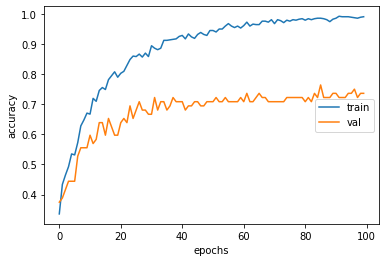

In [ ]:
plt.plot(history.history['acc'], label = 'train',)
plt.plot(history.history['val_acc'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# **Transfer Learning with ResNet50** 🌟

In [ ]:

# Define the shape of input images (height, width, channels)
image_shape = (460, 460, 3)

# Define the number of classes for classification
N_CLASSES = 4

# Define the batch size for training, validation, and testing
BATCH_SIZE = 32

# Create an ImageDataGenerator instance for training data with resnet preprocessing
train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=resnet.preprocess_input)
# Use the resnet.preprocess_input function for preprocessing the training data

# Create a generator for training data from the directory
train_generator = train_datagen.flow_from_directory(train_path,  # Directory of training images
                                                    batch_size=BATCH_SIZE,  # Batch size
                                                    target_size=(460, 460),  # Resize images to 460x460
                                                    class_mode='categorical')  # Use categorical labels

# Create an ImageDataGenerator instance for validation data with resnet preprocessing
valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=resnet.preprocess_input)
# Use the resnet.preprocess_input function for preprocessing the validation data

# Create a generator for validation data from the directory
valid_generator = valid_datagen.flow_from_directory(val_path,  # Directory of validation images
                                                    batch_size=BATCH_SIZE,  # Batch size
                                                    target_size=(460, 460),  # Resize images to 460x460
                                                    class_mode='categorical')  # Use categorical labels

# Create an ImageDataGenerator instance for test data with resnet preprocessing
test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=resnet.preprocess_input)
# Use the resnet.preprocess_input function for preprocessing the test data

# Create a generator for test data from the directory
test_generator = test_datagen.flow_from_directory(test_path,  # Directory of test images
                                                  batch_size=BATCH_SIZE,  # Batch size
                                                  target_size=(460, 460),  # Resize images to 460x460
                                                  class_mode='categorical')  # Use categorical labels


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(res_model.layers):
#    print(i, layer.name, "-", layer.trainable)

2022-06-26 12:54:34.625298: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 12:54:34.729530: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 12:54:34.730773: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-26 12:54:34.733389: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 1s 0us/step


In [ ]:
# Initialize a Sequential model
model = Sequential()

# Add the pre-trained ResNet50 base model to the Sequential model
model.add(res_model)
# The ResNet50 model is added as the base of the new model

# Add a Dropout layer with a dropout rate of 0.6 to reduce overfitting
model.add(Dropout(0.6))
# This layer randomly sets 60% of the input units to 0 at each update during training to prevent overfitting

# Add a Flatten layer to convert the 2D feature maps to 1D feature vectors
model.add(Flatten())
# This layer flattens the input, making it suitable for the fully connected (Dense) layer

# Add a BatchNormalization layer to normalize the activations of the previous layer
model.add(BatchNormalization())
# This layer normalizes the inputs to the next layer, improving the stability and performance of the network

# Add another Dropout layer with a dropout rate of 0.6 to further reduce overfitting
model.add(Dropout(0.6))
# This layer again randomly sets 60% of the input units to 0 at each update during training to prevent overfitting

# Add a Dense layer with the number of classes as units and softmax activation for classification
model.add(Dense(N_CLASSES, activation='softmax'))
# This layer has N_CLASSES units (one for each class) and uses softmax activation to output probabilities for each class

# Print the summary of the model architecture
model.summary()
# This method prints a summary of the model, including the layers, output shapes, and number of parameters

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 23,604,100
Trainable params: 14,988,292
Non-trainable params: 8,615,808
____________________________________

In [ ]:
# Import necessary libraries
from tensorflow.keras import optimizers
import tensorflow as tf

# Define the optimizer with a small learning rate and decay using the legacy module
optimizer = tf.keras.optimizers.legacy.Adam(learning_rate=0.00001, decay=1e-6)
# The Adam optimizer is used with a learning rate of 0.00001 and a decay rate of 1e-6 using the legacy module

# Compile the model with categorical cross-entropy loss and accuracy as the metric
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])
# The model is compiled to use categorical cross-entropy loss, the Adam optimizer, and track accuracy


In [ ]:
# Set up a ModelCheckpoint to save the best model during training
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-ResNet50.hdf5',  # Filepath where the model will be saved
                               monitor='val_loss',                       # Monitor the validation loss to determine if the model is improving
                               verbose=1,                                # Verbosity mode (1 = progress messages)
                               save_best_only=True)                      # Save the model only if the validation loss has improved
# The model will be saved to './chest_CT_SCAN-ResNet50.hdf5' whenever its validation loss improves.

# Set up EarlyStopping to stop training when the validation loss stops improving
early_stopping = EarlyStopping(verbose=1,  # Verbosity mode (1 = progress messages)
                               patience=15)  # Number of epochs with no improvement after which training will be stopped
# Training will stop if the validation loss does not improve for 15 consecutive epochs.


In [ ]:
# Train the model with the training generator and validate with the validation generator
history_res = model.fit(train_generator,            # Training data generator
                        steps_per_epoch=20,         # Number of batches per epoch
                        epochs=100,                 # Number of epochs to train the model
                        verbose=1,                  # Verbosity mode (1 = progress bar)
                        validation_data=valid_generator,  # Validation data generator
                        callbacks=[checkpointer, early_stopping])  # List of callbacks to apply during training
# The model is trained for up to 100 epochs, with early stopping and model checkpointing enabled.
# 'steps_per_epoch=20' specifies that one epoch will be completed after 20 batches.
# 'epochs=100' means the model will train for up to 100 epochs.
# 'validation_data=valid_generator' uses the validation generator for evaluating the model at the end of each epoch.
# 'callbacks=[checkpointer, early_stopping]' includes the ModelCheckpoint and EarlyStopping callbacks to monitor and control the training process.

2022-06-26 12:54:41.145824: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/100


2022-06-26 12:54:45.960438: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 25s 704ms/step - loss: 2.4695 - acc: 0.2822 - val_loss: 1.4059 - val_acc: 0.3194

Epoch 00001: val_loss improved from inf to 1.40593, saving model to ./chest_CT_SCAN-ResNet50.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/100
20/20 [==============================] - 11s 532ms/step - loss: 2.2179 - acc: 0.3638 - val_loss: 1.2706 - val_acc: 0.4028

Epoch 00002: val_loss improved from 1.40593 to 1.27063, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 3/100
20/20 [==============================] - 10s 516ms/step - loss: 1.9242 - acc: 0.3866 - val_loss: 1.1674 - val_acc: 0.4444

Epoch 00003: val_loss improved from 1.27063 to 1.16742, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 4/100
20/20 [==============================] - 10s 513ms/step - loss: 1.5521 - acc: 0.4861 - val_loss: 1.0785 - val_acc: 0.5000

Epoch 00004: val_loss improved from 1.16742 to 1.07848, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 5/100
20/20 [==============================] - 10s 511ms/step - loss: 1.6118 - acc: 0.4649 - val_loss: 1.0152 - val_acc: 0.5278

Epoch 00005: val_loss improved from 1.07848 to 1.01523, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 6/100
20/20 [==============================] -

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 6s 606ms/step - loss: 0.3190 - acc: 0.8952


# **VGG16**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
image_shape = (460, 460, 3)  # Image dimensions
N_CLASSES = 4  # Number of classes
BATCH_SIZE = 32  # Batch size

# Training data generator
train_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
train_generator = train_datagen.flow_from_directory(
    train_path,  # Training data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460, 460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Validation data generator
valid_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
valid_generator = valid_datagen.flow_from_directory(
    valid_path,  # Validation data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460, 460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Test data generator
test_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
test_generator = test_datagen.flow_from_directory(
    test_path,  # Test data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460, 460),  # Resize images
    class_mode='categorical'  # Categorical labels
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
vgg_model = VGG16(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in vgg_model.layers:
    layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(vgg_model.layers):
#    print(i, layer.name, "-", layer.trainable)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, BatchNormalization, Dense

# Create a Sequential model
model = Sequential()

# Add the VGG model as the base
model.add(vgg_model)

# Optional: Add Dropout layer to prevent overfitting (commented out)
# model.add(Dropout(0.6))

# Add Flatten layer to convert 2D matrices to 1D vectors
model.add(Flatten())

# Add BatchNormalization layer to normalize activations
model.add(BatchNormalization())

# Optional: Add another Dropout layer to prevent overfitting (commented out)
# model.add(Dropout(0.6))

# Add Dense layer with softmax activation for classification
model.add(Dense(N_CLASSES, activation='softmax'))

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 512)               14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 2052      
Total params: 14,718,788
Trainable params: 3,076
Non-trainable params: 14,715,712
_________________________________________________________________


In [ ]:
from tensorflow.keras import optimizers

# Define the optimizer
optimizer = optimizers.Adam(learning_rate=0.00001, decay=1e-6)  # Adam optimizer with learning rate and decay

# Compile the model
model.compile(
    optimizer=optimizer,  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['acc']  # Metrics to evaluate during training
)

In [ ]:
# Define a callback to save the best model
checkpointer = ModelCheckpoint(
    filepath='./chest_CT_SCAN-/vgg16.hdf5',  # Filepath to save the model
    monitor='val_loss',  # Monitor validation loss
    verbose=1,  # Verbosity mode
    save_best_only=True  # Save only the best model
)

# Define a callback for early stopping
early_stopping = EarlyStopping(
    verbose=1,  # Verbosity mode
    patience=15  # Number of epochs to wait for improvement
)


In [ ]:
# Train the model
history_vgg = model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=20,  # Steps per epoch
    epochs=100,  # Number of epochs
    verbose=1,  # Verbosity mode
    validation_data=valid_generator,  # Validation data generator
    callbacks=[checkpointer, early_stopping]  # Callbacks for saving and early stopping
)

Epoch 1/100
20/20 [==============================] - 23s 707ms/step - loss: 1.6895 - acc: 0.2202 - val_loss: 1.6254 - val_acc: 0.1806

Epoch 00001: val_loss improved from inf to 1.62540, saving model to ./chest_CT_SCAN-/vgg16.hdf5
Epoch 2/100
20/20 [==============================] - 9s 442ms/step - loss: 1.6683 - acc: 0.2349 - val_loss: 1.5899 - val_acc: 0.1806

Epoch 00002: val_loss improved from 1.62540 to 1.58988, saving model to ./chest_CT_SCAN-/vgg16.hdf5
Epoch 3/100
20/20 [==============================] - 9s 426ms/step - loss: 1.6548 - acc: 0.2480 - val_loss: 1.5595 - val_acc: 0.1806

Epoch 00003: val_loss improved from 1.58988 to 1.55946, saving model to ./chest_CT_SCAN-/vgg16.hdf5
Epoch 4/100
20/20 [==============================] - 9s 423ms/step - loss: 1.6489 - acc: 0.2333 - val_loss: 1.5338 - val_acc: 0.1806

Epoch 00004: val_loss improved from 1.55946 to 1.53383, saving model to ./chest_CT_SCAN-/vgg16.hdf5
Epoch 5/100
20/20 [==============================] - 8s 414ms/step 

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 11s 1s/step - loss: 1.0257 - acc: 0.5079


# **ResNet101**



**ResNet101** is a deep convolutional neural network (CNN) architecture that is part of the Residual Network (ResNet) family, introduced by Microsoft Research. It consists of 101 layers and utilizes residual learning to address the vanishing gradient problem, allowing for the training of much deeper networks. This architecture includes shortcut connections, or "skip connections," that enable the network to bypass one or more layers, which improves gradient flow and training efficiency. ResNet101 is widely used in transfer learning due to its powerful feature extraction capabilities, often pre-trained on large datasets like ImageNet.

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define constants
image_shape = (460, 460, 3)  # Image dimensions
N_CLASSES = 4  # Number of classes
BATCH_SIZE = 32  # Batch size

# Training data generator
train_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
train_generator = train_datagen.flow_from_directory(
    train_path,  # Training data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460, 460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Validation data generator
valid_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
valid_generator = valid_datagen.flow_from_directory(
    valid_path,  # Validation data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460, 460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Test data generator
test_datagen = ImageDataGenerator(dtype='float32', rescale=1./255.)  # Normalize pixels
test_generator = test_datagen.flow_from_directory(
    test_path,  # Test data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460, 460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
from tensorflow.keras.applications import ResNet101
# Load the ResNet101 model
res101_model = ResNet101(include_top=False, pooling='avg', weights='imagenet', input_shape=(image_shape))  # Pre-trained ResNet101 without top layers
# Freeze the layers
for layer in res101_model.layers:
    layer.trainable = False  # Set layer to non-trainable


171458560/171446536 [==============================] - 3s 0us/step


In [ ]:
# Create a Sequential model
model = Sequential()
# Add the ResNet101 base model
model.add(res101_model)  # Add ResNet101 model
# Optional: Add Dropout layer to prevent overfitting (commented out)
# model.add(Dropout(0.6))
# Add Flatten layer to convert 2D matrices to 1D vectors
model.add(Flatten())
# Add BatchNormalization layer to normalize activations
model.add(BatchNormalization())
# Add Dense layer with 300 units
model.add(Dense(300))  # Dense layer with 300 units
# Add another BatchNormalization layer
model.add(BatchNormalization())
# Add Dense layer with 100 units
model.add(Dense(100))  # Dense layer with 100 units
# Add another BatchNormalization layer
model.add(BatchNormalization())
# Optional: Add another Dropout layer to prevent overfitting (commented out)
# model.add(Dropout(0.6))
# Add Dense layer with softmax activation for classification
model.add(Dense(N_CLASSES, activation='softmax'))  # Output layer
# Print the model summary
model.summary()


Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet101 (Functional)       (None, 2048)              42658176  
_________________________________________________________________
flatten_2 (Flatten)          (None, 2048)              0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 2048)              8192      
_________________________________________________________________
dense_2 (Dense)              (None, 300)               614700    
_________________________________________________________________
batch_normalization_3 (Batch (None, 300)               1200      
_________________________________________________________________
dense_3 (Dense)              (None, 100)               30100     
_________________________________________________________________
batch_normalization_4 (Batch (None, 100)              

In [ ]:
# Define the optimizer
optimizer=optimizers.Adam(learning_rate=0.00001,decay=1e-6)  # Adam optimizer with learning rate and decay

# Compile the model
model.compile(
    optimizer=optimizer,  # Optimizer
    loss='categorical_crossentropy',  # Loss function for multi-class classification
    metrics=['acc']  # Metrics to evaluate during training
)

# Define a callback to save the best model
checkpointer=ModelCheckpoint(
    filepath='./chest_CT_SCAN-/res101.hdf5',  # Filepath to save the model
    monitor='val_loss',  # Monitor validation loss
    verbose=1,  # Verbosity mode
    save_best_only=True  # Save only the best model
)

# Define a callback for early stopping
early_stopping=EarlyStopping(
    verbose=1,  # Verbosity mode
    patience=15  # Number of epochs to wait for improvement
)

# Train the model
history_res101=model.fit(
    train_generator,  # Training data generator
    steps_per_epoch=20,  # Steps per epoch
    epochs=100,  # Number of epochs
    verbose=1,  # Verbosity mode
    validation_data=valid_generator,  # Validation data generator
    callbacks=[checkpointer,early_stopping]  # Callbacks for saving and early stopping
)


Epoch 1/100
20/20 [==============================] - 17s 577ms/step - loss: 2.0680 - acc: 0.1811 - val_loss: 4.4404 - val_acc: 0.1806

Epoch 00001: val_loss improved from inf to 4.44044, saving model to ./chest_CT_SCAN-/res101.hdf5
Epoch 2/100
20/20 [==============================] - 10s 461ms/step - loss: 1.3436 - acc: 0.4095 - val_loss: 3.9423 - val_acc: 0.1806

Epoch 00002: val_loss improved from 4.44044 to 3.94230, saving model to ./chest_CT_SCAN-/res101.hdf5
Epoch 3/100
20/20 [==============================] - 10s 465ms/step - loss: 1.0839 - acc: 0.5188 - val_loss: 3.5667 - val_acc: 0.1806

Epoch 00003: val_loss improved from 3.94230 to 3.56669, saving model to ./chest_CT_SCAN-/res101.hdf5
Epoch 4/100
20/20 [==============================] - 10s 477ms/step - loss: 0.9862 - acc: 0.5726 - val_loss: 3.1813 - val_acc: 0.1806

Epoch 00004: val_loss improved from 3.56669 to 3.18134, saving model to ./chest_CT_SCAN-/res101.hdf5
Epoch 5/100
20/20 [==============================] - 10s 467

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 5s 419ms/step - loss: 1.1575 - acc: 0.5968


# **VGG19**


**VGG19** is a deep convolutional neural network architecture developed by the Visual Geometry Group at the University of Oxford. It consists of 19 layers, including 16 convolutional layers and 3 fully connected layers. VGG19 is known for its simplicity, using small 3x3 convolutional filters consistently throughout the network, which helps in capturing fine details in images. This architecture has been widely used for image classification and transfer learning, often pre-trained on large datasets like ImageNet, providing a strong foundation for various computer vision tasks.

In [ ]:
# Define constants
image_shape=(460,460,3)  # Image dimensions
N_CLASSES=4  # Number of classes
BATCH_SIZE=32  # Batch size

# Training data generator
train_datagen=ImageDataGenerator(dtype='float32',preprocessing_function=vgg19.preprocess_input)  # Normalize pixels
train_generator=train_datagen.flow_from_directory(
    train_path,  # Training data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460,460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Validation data generator
valid_datagen=ImageDataGenerator(dtype='float32',preprocessing_function=vgg19.preprocess_input)  # Normalize pixels
valid_generator=valid_datagen.flow_from_directory(
    valid_path,  # Validation data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460,460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

# Test data generator
test_datagen=ImageDataGenerator(dtype='float32',preprocessing_function=vgg19.preprocess_input)  # Normalize pixels
test_generator=test_datagen.flow_from_directory(
    test_path,  # Test data path
    batch_size=BATCH_SIZE,  # Batch size
    target_size=(460,460),  # Resize images
    class_mode='categorical'  # Categorical labels
)

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
vgg19_model = VGG19(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in vgg19_model.layers:
    layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(res_model.layers):
#    print(i, layer.name, "-", layer.trainable)

80150528/80134624 [==============================] - 0s 0us/step


In [ ]:
# Create a Sequential model
model=Sequential()

# Add the VGG19 base model
model.add(vgg19_model)  # Add VGG19 model

# Optional: Add Dropout layer to prevent overfitting (commented out)
# model.add(Dropout(0.6))

# Add Flatten layer to convert 2D matrices to 1D vectors
model.add(Flatten())

# Add BatchNormalization layer to normalize activations
model.add(BatchNormalization())

# Optional: Add another Dropout layer to prevent overfitting (commented out)
# model.add(Dropout(0.6))

# Add Dense layer with softmax activation for classification
model.add(Dense(N_CLASSES,activation='softmax'))  # Output layer

# Print the model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Functional)           (None, 512)               20024384  
_________________________________________________________________
flatten_3 (Flatten)          (None, 512)               0         
_________________________________________________________________
batch_normalization_5 (Batch (None, 512)               2048      
_________________________________________________________________
dense_5 (Dense)              (None, 4)                 2052      
Total params: 20,028,484
Trainable params: 3,076
Non-trainable params: 20,025,408
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-VGG19.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_vgg19 = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 100,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/200
20/20 [==============================] - 11s 544ms/step - loss: 1.9839 - acc: 0.2529 - val_loss: 2.4675 - val_acc: 0.1944

Epoch 00001: val_loss improved from inf to 2.46753, saving model to ./chest_CT_SCAN-VGG19.hdf5
Epoch 2/200
20/20 [==============================] - 10s 495ms/step - loss: 1.9583 - acc: 0.2741 - val_loss: 2.2670 - val_acc: 0.1806

Epoch 00002: val_loss improved from 2.46753 to 2.26699, saving model to ./chest_CT_SCAN-VGG19.hdf5
Epoch 3/200
20/20 [==============================] - 10s 501ms/step - loss: 1.9392 - acc: 0.2643 - val_loss: 2.1317 - val_acc: 0.1944

Epoch 00003: val_loss improved from 2.26699 to 2.13167, saving model to ./chest_CT_SCAN-VGG19.hdf5
Epoch 4/200
20/20 [==============================] - 10s 501ms/step - loss: 1.9239 - acc: 0.2692 - val_loss: 2.0467 - val_acc: 0.2222

Epoch 00004: val_loss improved from 2.13167 to 2.04674, saving model to ./chest_CT_SCAN-VGG19.hdf5
Epoch 5/200
20/20 [==============================] - 10s 496ms/step 

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 5s 457ms/step - loss: 1.1353 - acc: 0.5651


# **DenseNet201**

**DenseNet201** is a deep convolutional neural network (CNN) architecture that is part of the Densely Connected Networks (DenseNet) family. It comprises 201 layers and is designed to ensure maximum information flow between layers by connecting each layer to every other layer in a feed-forward fashion. This dense connectivity pattern improves gradient flow, reduces the number of parameters, and promotes feature reuse, leading to more efficient training and better performance. DenseNet201 is particularly effective in image classification and transfer learning tasks, leveraging its intricate layer connections to extract robust features from images.

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
dense_model = DenseNet201(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in dense_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(dense_model.layers):
#    print(i, layer.name, "-", layer.trainable)


74850304/74836368 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(dense_model)
#model.add(Dropout(0.5))
model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.6))
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
flatten_4 (Flatten)          (None, 1920)              0         
_________________________________________________________________
batch_normalization_6 (Batch (None, 1920)              7680      
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 7684      
Total params: 18,337,348
Trainable params: 6,990,084
Non-trainable params: 11,347,264
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-DenseNet201.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_dense = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 200,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/200
20/20 [==============================] - 28s 773ms/step - loss: 1.3360 - acc: 0.4290 - val_loss: 1.3543 - val_acc: 0.3194

Epoch 00001: val_loss improved from inf to 1.35428, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 2/200
20/20 [==============================] - 11s 525ms/step - loss: 0.7707 - acc: 0.7374 - val_loss: 1.2322 - val_acc: 0.4167

Epoch 00002: val_loss improved from 1.35428 to 1.23215, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 3/200
20/20 [==============================] - 11s 515ms/step - loss: 0.5573 - acc: 0.8450 - val_loss: 1.1418 - val_acc: 0.5139

Epoch 00003: val_loss improved from 1.23215 to 1.14177, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 4/200
20/20 [==============================] - 11s 543ms/step - loss: 0.4206 - acc: 0.9021 - val_loss: 1.0443 - val_acc: 0.5417

Epoch 00004: val_loss improved from 1.14177 to 1.04427, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 5/200
20/20 [=========================

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 7s 645ms/step - loss: 0.5469 - acc: 0.8190


# **EfficientNetB4**


**EfficientNetB4** is part of the EfficientNet family of convolutional neural networks, developed by Google AI. This architecture scales up the model's depth, width, and resolution in a balanced manner using a compound scaling method, achieving state-of-the-art performance with fewer parameters and lower computational costs. EfficientNetB4, specifically, is a larger variant in the family that provides an optimal trade-off between accuracy and efficiency. It is often used in transfer learning tasks due to its strong performance on image classification benchmarks and its ability to generalize well across different datasets.

#### Required Image Size

The required input image size for EfficientNetB4 is **380 x 380 pixels** with 3 color channels (RGB).

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=efficientnet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=efficientnet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=efficientnet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
efficient_model = EfficientNetB4(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in efficient_model.layers:
    if 'block7'not in layer.name and'top' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(efficient_model.layers):
#    print(i, layer.name, "-", layer.trainable)


71696384/71686520 [==============================] - 1s 0us/step


In [ ]:
model = Sequential()
model.add(efficient_model)
#model.add(Dropout(0.6))
model.add(Flatten())
model.add(BatchNormalization())
#model.add(Dropout(0.6))
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb4 (Functional)  (None, 1792)              17673823  
_________________________________________________________________
flatten_5 (Flatten)          (None, 1792)              0         
_________________________________________________________________
batch_normalization_7 (Batch (None, 1792)              7168      
_________________________________________________________________
dense_7 (Dense)              (None, 4)                 7172      
Total params: 17,688,163
Trainable params: 5,287,160
Non-trainable params: 12,401,003
_________________________________________________________________


In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-EfficientNet.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_efficient = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 200,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/200
20/20 [==============================] - 24s 657ms/step - loss: 1.8937 - acc: 0.2643 - val_loss: 1.4137 - val_acc: 0.3194

Epoch 00001: val_loss improved from inf to 1.41367, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 2/200
20/20 [==============================] - 10s 466ms/step - loss: 1.4198 - acc: 0.3866 - val_loss: 1.3631 - val_acc: 0.3611

Epoch 00002: val_loss improved from 1.41367 to 1.36310, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 3/200
20/20 [==============================] - 10s 491ms/step - loss: 1.0620 - acc: 0.5677 - val_loss: 1.3133 - val_acc: 0.3889

Epoch 00003: val_loss improved from 1.36310 to 1.31327, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 4/200
20/20 [==============================] - 10s 464ms/step - loss: 0.9396 - acc: 0.6232 - val_loss: 1.2599 - val_acc: 0.4167

Epoch 00004: val_loss improved from 1.31327 to 1.25986, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 5/200
20/20 [=====================

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 5s 457ms/step - loss: 0.4574 - acc: 0.8540


# **MobileNetV2**


**MobileNetV2** is a lightweight convolutional neural network architecture designed for mobile and embedded vision applications. Developed by Google, it improves upon the original MobileNet by introducing inverted residuals and linear bottlenecks. This design enables the network to maintain high accuracy while significantly reducing the number of parameters and computational complexity, making it ideal for real-time applications on resource-constrained devices. MobileNetV2 is efficient in both speed and size, providing a balance between performance and efficiency.

#### Required Image Size

The required input image size for MobileNetV2 is **224 x 224 pixels** with 3 color channels (RGB).

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=mobilenet_v2.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=mobilenet_v2.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=mobilenet_v2.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
mobile_model = MobileNetV2(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in mobile_model.layers:
    if 'block_15'not in layer.name and'block_16' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(mobile_model.layers):
#    print(i, layer.name, "-", layer.trainable)

9420800/9406464 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(mobile_model)
model.add(Dropout(0.6))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.6))
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
mobilenetv2_1.00_224 (Functi (None, 1280)              2257984   
_________________________________________________________________
dropout_2 (Dropout)          (None, 1280)              0         
_________________________________________________________________
flatten_6 (Flatten)          (None, 1280)              0         
_________________________________________________________________
batch_normalization_8 (Batch (None, 1280)              5120      
_________________________________________________________________
dropout_3 (Dropout)          (None, 1280)              0         
_________________________________________________________________
dense_8 (Dense)              (None, 4)                 5124      
Total params: 2,268,228
Trainable params: 801,604
Non-trainable params: 1,466,624
______________________________________

In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-6)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-MobileNet.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=15)

In [ ]:
history_mobile = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 200,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

Epoch 1/200
20/20 [==============================] - 13s 460ms/step - loss: 2.6179 - acc: 0.2447 - val_loss: 1.3702 - val_acc: 0.3333

Epoch 00001: val_loss improved from inf to 1.37016, saving model to ./chest_CT_SCAN-MobileNet.hdf5
Epoch 2/200
20/20 [==============================] - 8s 391ms/step - loss: 2.3434 - acc: 0.2855 - val_loss: 1.3503 - val_acc: 0.3333

Epoch 00002: val_loss improved from 1.37016 to 1.35033, saving model to ./chest_CT_SCAN-MobileNet.hdf5
Epoch 3/200
20/20 [==============================] - 8s 388ms/step - loss: 2.2709 - acc: 0.3002 - val_loss: 1.3240 - val_acc: 0.3333

Epoch 00003: val_loss improved from 1.35033 to 1.32396, saving model to ./chest_CT_SCAN-MobileNet.hdf5
Epoch 4/200
20/20 [==============================] - 8s 387ms/step - loss: 2.3761 - acc: 0.3148 - val_loss: 1.3032 - val_acc: 0.3056

Epoch 00004: val_loss improved from 1.32396 to 1.30318, saving model to ./chest_CT_SCAN-MobileNet.hdf5
Epoch 5/200
20/20 [==============================] - 8s

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 4s 383ms/step - loss: 0.6585 - acc: 0.7333


---

# The Most three promised models are: 🌟
* ResNet50 **86 on test data** 📉
* DenseNet201 **88 on test data** 📊
* EfficientNetB4 **90 on test data** 📈

# **Let's Play with HyperParameter Tuning** 🎛️


## **ResNet50**

In [ ]:
image_shape = (460,460,3)
N_CLASSES = 4
BATCH_SIZE = 32

train_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
train_generator = train_datagen.flow_from_directory(train_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

valid_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(valid_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

test_datagen = ImageDataGenerator(dtype='float32')#, preprocessing_function=resnet.preprocess_input)
test_generator = test_datagen.flow_from_directory(test_path,
                                                   batch_size = BATCH_SIZE,
                                                   target_size = (460,460),
                                                   class_mode = 'categorical')

Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(res_model.layers):
#    print(i, layer.name, "-", layer.trainable)

2022-06-27 14:39:12.274930: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 14:39:12.368983: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 14:39:12.369726: I tensorflow/stream_executor/cuda/cuda_gpu_executor.cc:937] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2022-06-27 14:39:12.371282: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compil

94781440/94765736 [==============================] - 0s 0us/step


In [ ]:
model = Sequential()
model.add(res_model)
model.add(Dropout(0.4))
model.add(Flatten())
model.add(BatchNormalization())
model.add(Dropout(0.4))
model.add(Dense(N_CLASSES, activation='softmax'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Functional)        (None, 2048)              23587712  
_________________________________________________________________
dropout (Dropout)            (None, 2048)              0         
_________________________________________________________________
flatten (Flatten)            (None, 2048)              0         
_________________________________________________________________
batch_normalization (BatchNo (None, 2048)              8192      
_________________________________________________________________
dropout_1 (Dropout)          (None, 2048)              0         
_________________________________________________________________
dense (Dense)                (None, 4)                 8196      
Total params: 23,604,100
Trainable params: 14,988,292
Non-trainable params: 8,615,808
____________________________________

In [ ]:
optimizer = optimizers.Adam(learning_rate= 0.00001, decay= 1e-5)
model.compile(optimizer=optimizer, loss = 'categorical_crossentropy', metrics = ['acc'])

In [ ]:
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-ResNet50.hdf5',
                            monitor='val_loss', verbose = 1,
                            save_best_only=True)
early_stopping = EarlyStopping(verbose=1, patience=20)

In [ ]:
history_res = model.fit(train_generator,
                    steps_per_epoch = 20,
                    epochs = 200,
                    verbose = 1,
                    validation_data = valid_generator,
                    callbacks = [checkpointer, early_stopping])

2022-06-27 14:39:25.193566: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/200


2022-06-27 14:39:30.532919: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


20/20 [==============================] - 24s 639ms/step - loss: 2.0633 - acc: 0.3197 - val_loss: 1.3436 - val_acc: 0.4028

Epoch 00001: val_loss improved from inf to 1.34360, saving model to ./chest_CT_SCAN-ResNet50.hdf5


/opt/conda/lib/python3.7/site-packages/keras/utils/generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/200
20/20 [==============================] - 9s 424ms/step - loss: 1.3716 - acc: 0.4829 - val_loss: 1.1270 - val_acc: 0.4444

Epoch 00002: val_loss improved from 1.34360 to 1.12697, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 3/200
20/20 [==============================] - 9s 458ms/step - loss: 1.1629 - acc: 0.5612 - val_loss: 1.0275 - val_acc: 0.4583

Epoch 00003: val_loss improved from 1.12697 to 1.02752, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 4/200
20/20 [==============================] - 9s 419ms/step - loss: 1.0435 - acc: 0.6069 - val_loss: 0.9677 - val_acc: 0.4861

Epoch 00004: val_loss improved from 1.02752 to 0.96773, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 5/200
20/20 [==============================] - 9s 420ms/step - loss: 0.8340 - acc: 0.6770 - val_loss: 0.9091 - val_acc: 0.5833

Epoch 00005: val_loss improved from 0.96773 to 0.90907, saving model to ./chest_CT_SCAN-ResNet50.hdf5
Epoch 6/200
20/20 [==============================] - 9s 

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 6s 584ms/step - loss: 0.2946 - acc: 0.9175


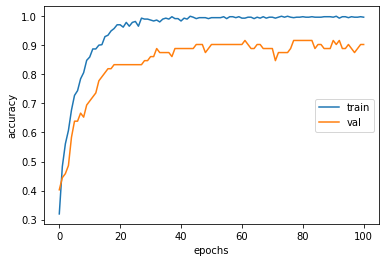

In [ ]:
plt.plot(history_res.history['acc'], label = 'train',)
plt.plot(history_res.history['val_acc'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# **DenseNet201**

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import densenet  # Ensure densenet is properly imported for preprocessing_function

# Define constants for image shape, number of classes, and batch size
image_shape = (460, 460, 3)  # Shape of the input images (height, width, channels)
N_CLASSES = 4  # Number of classes in the classification task
BATCH_SIZE = 32  # Batch size for data generators

# Create an ImageDataGenerator for training data with DenseNet preprocessing
train_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
train_generator = train_datagen.flow_from_directory(
    train_path,  # Path to the training data directory
    batch_size=BATCH_SIZE,  # Batch size for training
    target_size=(460, 460),  # Resize all images to the target size
    class_mode='categorical'  # Use categorical labels for the classes
)

# Create an ImageDataGenerator for validation data with DenseNet preprocessing
valid_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
valid_generator = valid_datagen.flow_from_directory(
    valid_path,  # Path to the validation data directory
    batch_size=BATCH_SIZE,  # Batch size for validation
    target_size=(460, 460),  # Resize all images to the target size
    class_mode='categorical'  # Use categorical labels for the classes
)

# Create an ImageDataGenerator for test data with DenseNet preprocessing
test_datagen = ImageDataGenerator(dtype='float32', preprocessing_function=densenet.preprocess_input)
test_generator = test_datagen.flow_from_directory(
    test_path,  # Path to the test data directory
    batch_size=BATCH_SIZE,  # Batch size for testing
    target_size=(460, 460),  # Resize all images to the target size
    class_mode='categorical'  # Use categorical labels for the classes
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
dense_model = DenseNet201(include_top=False, pooling='avg', weights='imagenet', input_shape = (image_shape))
for layer in dense_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False
# Check if all layers except conv5 layers are not trainable
#for i, layer in enumerate(dense_model.layers):
#    print(i, layer.name, "-", layer.trainable)


In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense

# Create a Sequential model
model = Sequential()

# Add the base DenseNet model to the Sequential model
model.add(dense_model)

# Optional: Add a Dropout layer to prevent overfitting (currently commented out)
# model.add(Dropout(0.5))

# Add a Flatten layer to convert the 2D matrix to a 1D vector
model.add(Flatten())

# Add a BatchNormalization layer to normalize the activations of the previous layer
model.add(BatchNormalization())

# Optional: Add another Dropout layer to prevent overfitting (currently commented out)
# model.add(Dropout(0.6))

# Add a Dense layer with softmax activation for the output layer (N_CLASSES is the number of classes)
model.add(Dense(N_CLASSES, activation='softmax'))

# Print the model summary
model.summary()


Model: "sequential_8"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
densenet201 (Functional)     (None, 1920)              18321984  
_________________________________________________________________
flatten_8 (Flatten)          (None, 1920)              0         
_________________________________________________________________
batch_normalization_10 (Batc (None, 1920)              7680      
_________________________________________________________________
dense_10 (Dense)             (None, 4)                 7684      
Total params: 18,337,348
Trainable params: 6,990,084
Non-trainable params: 11,347,264
_________________________________________________________________


In [ ]:
# Initialize the Adam optimizer with a specific learning rate and decay
optimizer = optimizers.Adam(
    learning_rate=0.00001,  # The learning rate for the optimizer
    decay=1e-6  # The decay rate for the learning rate over each update
)

# Compile the model with the specified optimizer, loss function, and evaluation metric
model.compile(
    optimizer=optimizer,  # The optimizer to use for training
    loss='categorical_crossentropy',  # The loss function to minimize
    metrics=['acc']  # The evaluation metric to monitor during training
)


In [ ]:
# Callback to save the model after every epoch
checkpointer = ModelCheckpoint(
    filepath='./chest_CT_SCAN-DenseNet201.hdf5',  # File path where the model will be saved
    monitor='val_loss',  # Metric to monitor for saving the model
    verbose=1,  # Verbosity mode (1 = progress messages)
    save_best_only=True  # Save only the model with the best validation loss
)

# Callback to stop training early if the monitored metric stops improving
early_stopping = EarlyStopping(
    verbose=1,  # Verbosity mode (1 = progress messages)
    patience=15  # Number of epochs with no improvement after which training will be stopped
)

In [ ]:
# Train the model using the training data
history_dense = model.fit(
    train_generator,  # The generator that provides training data
    steps_per_epoch=20,  # Number of batches to process per epoch
    epochs=200,  # Total number of epochs to train the model
    verbose=1,  # Verbosity mode (1 = progress bar)
    validation_data=valid_generator,  # The generator that provides validation data
    callbacks=[checkpointer, early_stopping]  # List of callback functions to apply during training
)

Epoch 1/200
20/20 [==============================] - 11s 522ms/step - loss: 0.1188 - acc: 0.9984 - val_loss: 0.6524 - val_acc: 0.7639

Epoch 00009: val_loss improved from 0.70285 to 0.65240, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 10/200
20/20 [==============================] - 11s 537ms/step - loss: 0.1027 - acc: 0.9984 - val_loss: 0.6091 - val_acc: 0.7778

Epoch 00010: val_loss improved from 0.65240 to 0.60909, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 11/200
20/20 [==============================] - 10s 515ms/step - loss: 0.1005 - acc: 0.9951 - val_loss: 0.5631 - val_acc: 0.8194

Epoch 00011: val_loss improved from 0.60909 to 0.56315, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 12/200
20/20 [==============================] - 11s 532ms/step - loss: 0.0938 - acc: 0.9967 - val_loss: 0.5236 - val_acc: 0.8611

Epoch 00012: val_loss improved from 0.56315 to 0.52361, saving model to ./chest_CT_SCAN-DenseNet201.hdf5
Epoch 13/200
20/20 [=================

In [ ]:
result = model.evaluate(test_generator)

10/10 [==============================] - 5s 433ms/step - loss: 0.3347 - acc: 0.9016


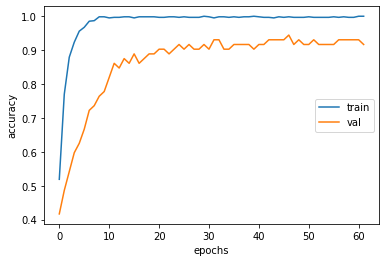

In [ ]:
plt.plot(history_dense.history['acc'], label = 'train',)
plt.plot(history_dense.history['val_acc'], label = 'val')

plt.legend(loc = 'right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()



# **Hyperparameter Tunning EffiecientNetB4**

In [ ]:
# Import necessary libraries
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Define image shape and number of classes
image_shape = (460, 460, 3)
N_CLASSES = 4
BATCH_SIZE = 32

# Create an ImageDataGenerator instance for training data
# dtype='float32' ensures the data type is float32 for consistency with TensorFlow operations
train_datagen = ImageDataGenerator(dtype='float32') # Optional preprocessing_function can be added for specific model preprocessing

# Generate batches of tensor image data from the training directory
train_generator = train_datagen.flow_from_directory(
    train_path,                # Path to the training data directory
    batch_size=BATCH_SIZE,     # Number of images to yield per batch
    target_size=(460, 460),    # Resize images to 460x460 pixels
    class_mode='categorical'   # Specify categorical labels (one-hot encoded)
)

# Create an ImageDataGenerator instance for validation data
valid_datagen = ImageDataGenerator(dtype='float32') # Optional preprocessing_function can be added for specific model preprocessing

# Generate batches of tensor image data from the validation directory
valid_generator = valid_datagen.flow_from_directory(
    valid_path,                # Path to the validation data directory
    batch_size=BATCH_SIZE,     # Number of images to yield per batch
    target_size=(460, 460),    # Resize images to 460x460 pixels
    class_mode='categorical'   # Specify categorical labels (one-hot encoded)
)

# Create an ImageDataGenerator instance for testing data
test_datagen = ImageDataGenerator(dtype='float32') # Optional preprocessing_function can be added for specific model preprocessing

# Generate batches of tensor image data from the testing directory
test_generator = test_datagen.flow_from_directory(
    test_path,                 # Path to the testing data directory
    batch_size=BATCH_SIZE,     # Number of images to yield per batch
    target_size=(460, 460),    # Resize images to 460x460 pixels
    class_mode='categorical'   # Specify categorical labels (one-hot encoded)
)


Found 613 images belonging to 4 classes.
Found 72 images belonging to 4 classes.
Found 315 images belonging to 4 classes.


In [ ]:
# Import the ResNet50 model from Keras applications
from tensorflow.keras.applications import ResNet50

# Load the ResNet50 model pre-trained on ImageNet, excluding the top layers
# include_top=False excludes the fully connected layers at the top of the network
# pooling='avg' applies global average pooling to the output of the last convolutional block
# input_shape specifies the input shape of the images
res_model = ResNet50(include_top=False, pooling='avg', weights='imagenet', input_shape=image_shape)

# Freeze all layers except those in the 'conv5' block to prevent them from being trainable
for layer in res_model.layers:
    if 'conv5' not in layer.name:
        layer.trainable = False

# Optional: Uncomment this section to check if all layers except 'conv5' layers are not trainable
# for i, layer in enumerate(res_model.layers):
#     print(i, layer.name, "-", layer.trainable)


In [ ]:
# Import necessary layers from Keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dropout, Flatten, BatchNormalization, Dense

# Initialize a sequential model
model = Sequential()

# Add the pre-trained ResNet50 model as the base of the new model
model.add(res_model)

# Add a Dropout layer to prevent overfitting with a rate of 0.4
model.add(Dropout(0.4))

# Add a Flatten layer to convert the 2D matrix data to a vector
model.add(Flatten())

# Add a BatchNormalization layer to normalize the activations of the previous layer
model.add(BatchNormalization())

# Add another Dropout layer to prevent overfitting with a rate of 0.4
model.add(Dropout(0.4))

# Add a Dense layer with N_CLASSES units and softmax activation for the output layer
# This layer classifies the input into one of the N_CLASSES categories
model.add(Dense(N_CLASSES, activation='softmax'))

# Print the summary of the model to check the architecture and the number of parameters
model.summary()


Model: "sequential_9"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
efficientnetb4 (Functional)  (None, 1792)              17673823  
_________________________________________________________________
flatten_9 (Flatten)          (None, 1792)              0         
_________________________________________________________________
batch_normalization_11 (Batc (None, 1792)              7168      
_________________________________________________________________
dense_11 (Dense)             (None, 4)                 7172      
Total params: 17,688,163
Trainable params: 5,287,160
Non-trainable params: 12,401,003
_________________________________________________________________


In [ ]:
# Import the Adam optimizer from Keras
from tensorflow.keras import optimizers

# Initialize the Adam optimizer with a specific learning rate and decay
# learning_rate=0.00001 sets the step size for updating weights
# decay=1e-5 reduces the learning rate over each update to ensure convergence
optimizer = optimizers.Adam(learning_rate=0.00001, decay=1e-5)

# Compile the model with the specified optimizer, loss function, and evaluation metric
# optimizer specifies the optimization algorithm to use
# loss='categorical_crossentropy' defines the loss function for multi-class classification
# metrics=['acc'] specifies the evaluation metric to track during training (accuracy in this case)
model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['acc'])


In [ ]:
# Import necessary callbacks from Keras
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

# Initialize ModelCheckpoint to save the model with the best validation loss
# filepath specifies where to save the model file
# monitor='val_loss' specifies to monitor the validation loss
# verbose=1 enables progress reporting during training
# save_best_only=True ensures only the best model (with the lowest validation loss) is saved
checkpointer = ModelCheckpoint(filepath='./chest_CT_SCAN-ResNet50.hdf5',
                               monitor='val_loss', verbose=1,
                               save_best_only=True)

# Initialize EarlyStopping to stop training when the validation loss stops improving
# verbose=1 enables progress reporting during training
# patience=20 specifies the number of epochs with no improvement after which training will be stopped
early_stopping = EarlyStopping(verbose=1, patience=20)


In [ ]:
# Train the model
history_res = model.fit(
    train_generator,               # Training data generator
    steps_per_epoch=20,            # Steps per epoch
    epochs=200,                    # Number of epochs
    verbose=1,                     # Verbosity mode
    validation_data=valid_generator, # Validation data generator
    callbacks=[checkpointer, early_stopping] # Callbacks for checkpointing and early stopping
)

Epoch 1/200
20/20 [==============================] - 22s 630ms/step - loss: 1.9451 - acc: 0.2626 - val_loss: 1.3411 - val_acc: 0.2917

Epoch 00001: val_loss improved from inf to 1.34111, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 2/200
20/20 [==============================] - 10s 478ms/step - loss: 1.4326 - acc: 0.4290 - val_loss: 1.2882 - val_acc: 0.2917

Epoch 00002: val_loss improved from 1.34111 to 1.28825, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 3/200
20/20 [==============================] - 10s 473ms/step - loss: 1.1636 - acc: 0.5334 - val_loss: 1.2401 - val_acc: 0.4028

Epoch 00003: val_loss improved from 1.28825 to 1.24007, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 4/200
20/20 [==============================] - 9s 482ms/step - loss: 1.0065 - acc: 0.6085 - val_loss: 1.1879 - val_acc: 0.4722

Epoch 00004: val_loss improved from 1.24007 to 1.18793, saving model to ./chest_CT_SCAN-EfficientNet.hdf5
Epoch 5/200
20/20 [======================

In [ ]:
# Evaluate the model on the test data
result = model.evaluate(test_generator)

10/10 [==============================] - 4s 403ms/step - loss: 0.3353 - acc: 0.8952


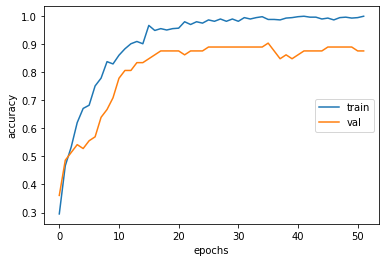

In [ ]:
import matplotlib.pyplot as plt

# Plot training accuracy
plt.plot(history_res.history['acc'], label='train')

# Plot validation accuracy
plt.plot(history_res.history['val_acc'], label='val')

# Add legend, labels, and display the plot
plt.legend(loc='right')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.show()

# Final Models are: After Fine Tuning ✨
* **ResNet50** with **train 99.5 🟢 validation 89 🟡 test 91.7 🔵**
* **DenseNet201** with **train 100 🟢 validation 94.5 🟢 test 90 🟡**
* **EfficientNetB4** with **train 99 🟢 validation 94.5 🟢 test 89.5 🟡**


In [ ]:
ResNet_Path = '../input/models/chest_CT_SCAN-ResNet50(1).hdf5'
DenseNet_Path = '../input/models/chest_CT_SCAN-DenseNet201.hdf5'

ResNet_model = tf.keras.models.load_model(ResNet_Path)
DenseNet_model = tf.keras.models.load_model(DenseNet_Path)

In [ ]:
path_adeno = '../input/chest-ctscan-images/Data/test/adenocarcinoma'
path_large = '../input/chest-ctscan-images/Data/test/large.cell.carcinoma'
path_normal = '../input/chest-ctscan-images/Data/test/normal'
path_squamous = '../input/chest-ctscan-images/Data/test/squamous.cell.carcinoma'

results_total = {'adeno':{},'large':{},'normal':{},'squamous':{}}
results_resnet = {'adeno':{},'large':{},'normal':{},'squamous':{}}
results_densenet = {'adeno':{},'large':{},'normal':{},'squamous':{}}

keys = ['adeno','large','normal','squamous']
for path ,key in zip([path_adeno,path_large,path_normal,path_squamous],keys):
    images = os.listdir(path)

    for image in images:

        my_image = load_img(path+'/'+image, target_size=(460, 460))
        my_image = img_to_array(my_image)
        my_image = my_image.reshape((1, 460, 460,3))
        my_image_dense = my_image.copy()
    # ResNet Only
        results_resnet[key][np.argmax(ResNet_model.predict(my_image))] = results_resnet.get(key).get(np.argmax(ResNet_model.predict(my_image)),0) +1
    # ResNet + DenseNet
        if np.max(ResNet_model.predict(my_image)) >=  np.max(DenseNet_model.predict(my_image)):

            results_total[key][np.argmax(ResNet_model.predict(my_image))] = results_total.get(key).get(np.argmax(ResNet_model.predict(my_image)),0) +1
        else:
            my_image = densenet.preprocess_input(my_image)
            results_total[key][np.argmax(DenseNet_model.predict(my_image))] = results_total[key].get(np.argmax(DenseNet_model.predict(my_image)),0) +1
    # DenseNet Only
        my_image_dense = densenet.preprocess_input(my_image_dense)
        results_densenet[key][np.argmax(DenseNet_model.predict(my_image_dense))] = results_densenet.get(key).get(np.argmax(DenseNet_model.predict(my_image_dense)),0) +1


2022-06-28 18:16:45.841578: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)
2022-06-28 18:16:48.143904: I tensorflow/stream_executor/cuda/cuda_dnn.cc:369] Loaded cuDNN version 8005


In [ ]:
print(results_total,'\n',results_resnet,'\n',results_densenet)

{'adeno': {0: 109, 3: 2, 1: 9}, 'large': {1: 48, 0: 2, 3: 1}, 'normal': {2: 53, 1: 1}, 'squamous': {3: 83, 0: 7}} 
 {'adeno': {0: 107, 3: 2, 1: 11}, 'large': {1: 49, 0: 2}, 'normal': {2: 53, 1: 1}, 'squamous': {3: 78, 1: 3, 0: 9}} 
 {'adeno': {0: 103, 3: 6, 1: 11}, 'large': {1: 45, 3: 2, 0: 4}, 'normal': {2: 53, 1: 1}, 'squamous': {3: 76, 0: 13, 1: 1}}


# From results we can see that using both models **argmax(ResNet + DenseNet)** is more accurate rather than using only one of them

In [ ]:
adeno_acc = 91 # conflicting with large
large_acc = 94
normal_acc = 98.5
squamous_acc = 92 #conflicting with adeno

acc = {'adeno_acc':91,'large_acc':94,'normal_acc':98.5,'squamous_acc':92}
df_acc = pd.DataFrame(acc.values(),index=acc.keys(),columns=['ACCURACY %'])
df_acc

,ACCURACY %
adeno_acc,91.0
large_acc,94.0
normal_acc,98.5
squamous_acc,92.0


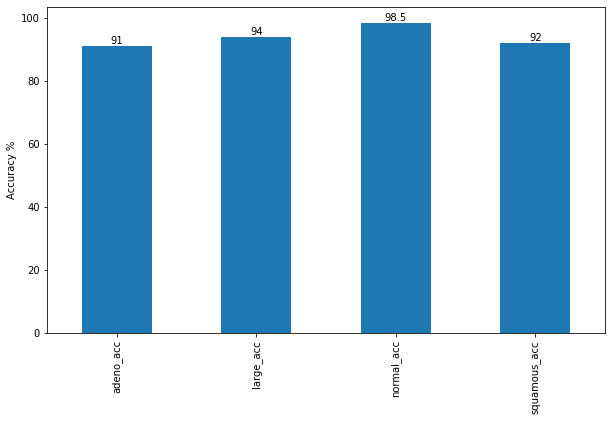

In [ ]:
ax = df_acc.plot(kind='bar', stacked= True, figsize= (10,6), ylabel= 'Accuracy %',legend = None)

for container in ax.containers:
    ax.bar_label(container)

# **Prediction**

In [ ]:
def chestScanPrediction(path, _model, actual_label):
    classes_dir = ["Adenocarcinoma", "Large cell carcinoma", "Normal", "Squamous cell carcinoma"]
    num_images = len(path)
    for i in range(num_images):
        # Loading Image
        img = image.load_img(path[i], target_size=(350, 350))

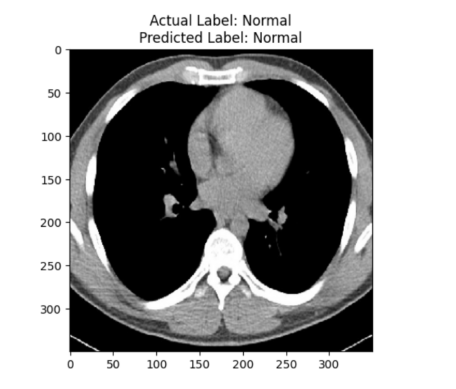

In [ ]:
path = [ '../input/chest-ctscan-images/Data/test/normal' ]

actual_labels = [1, 0, 2, 3]

chestScanPrediction(path, ResNet_Path, actual_labels)

        # Displaying the image
        plt.imshow(img)
        plt.title("Actual Label: " + classes_dir[actual_label[i]] + "\nPredicted Label: " + classes_dir[pred])
        plt.show()